In [4]:
import sklearn
from sklearn.datasets import load_boston
import pandas as pd

In [5]:
boston = load_boston()

In [8]:
boston_df = pd.DataFrame(data= boston.data, columns = boston.feature_names)
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98


In [9]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [10]:
boston_df ['PRICE'] = boston.target

In [11]:
boston_df.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.09,1.0,296.0,15.3,396.9,4.98,24.0


In [22]:
from pycaret.regression import *
exp1 = setup(boston_df, "PRICE")

 
Setup Succesfully Completed!


,Description,Value
0,session_id,4198
1,Transform Target,False
2,Transform Target Method,None
3,Original Data,"(506, 14)"
4,Missing Values,False
5,Numeric Features,12
6,Categorical Features,1
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# compare models

In [23]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2.138100,8.902900,2.851600,0.890500,0.129700,0.105700
1,CatBoost Regressor,1.986000,8.996200,2.912800,0.887800,0.128800,0.098500
2,Extra Trees Regressor,2.036200,9.155700,2.901400,0.884700,0.127400,0.100700
3,Extreme Gradient Boosting,2.238500,10.429500,3.087100,0.871400,0.137300,0.109800
4,Random Forest,2.261200,10.313400,3.103900,0.870000,0.143900,0.115600
5,Light Gradient Boosting Machine,2.367500,11.943300,3.365400,0.850800,0.154400,0.119800
6,AdaBoost Regressor,2.951100,15.807900,3.890500,0.798800,0.178400,0.152500
7,Decision Tree,2.981400,18.945700,4.174700,0.769100,0.192400,0.150000
8,Least Angle Regression,3.413600,25.047800,4.816800,0.699200,0.248500,0.170100
9,Linear Regression,3.409800,25.152400,4.825500,0.698100,0.247700,0.169600


# Create Model

In [30]:
gbr_model = create_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.7288,6.7507,2.5982,0.9298,0.1142,0.0837
1,1.1892,2.2250,1.4916,0.9640,0.0745,0.0634
2,3.5387,24.8488,4.9849,0.7306,0.2109,0.1701
3,2.4508,11.2054,3.3475,0.8885,0.1558,0.1147
4,2.1371,7.1567,2.6752,0.9287,0.1047,0.0957
5,2.4528,8.4394,2.9051,0.9042,0.1466,0.1309
6,1.8077,5.7053,2.3886,0.9277,0.1073,0.0858
7,2.1302,8.6111,2.9345,0.8209,0.1656,0.1260
8,1.6119,4.1615,2.0400,0.9375,0.0953,0.0796
9,2.3341,9.9250,3.1504,0.8732,0.1216,0.1073


# Tune it

In [32]:
tuned_gbr = tune_model('gbr')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.9219,7.3352,2.7084,0.9237,0.1204,0.0859
1,1.6311,4.4724,2.1148,0.9277,0.1289,0.0963
2,3.0134,19.4636,4.4118,0.7890,0.1761,0.1373
3,2.3312,9.9194,3.1495,0.9013,0.1597,0.1151
4,2.0576,8.0227,2.8324,0.9201,0.1107,0.0947
5,2.7585,15.5732,3.9463,0.8232,0.2023,0.1606
6,2.5013,11.7246,3.4241,0.8514,0.1431,0.1169
7,2.3547,10.8398,3.2924,0.7745,0.1739,0.1307
8,2.0319,6.1947,2.4889,0.9069,0.1125,0.0950
9,3.0946,15.2586,3.9062,0.8051,0.1678,0.1474


# SHAP Values (impact on model output)

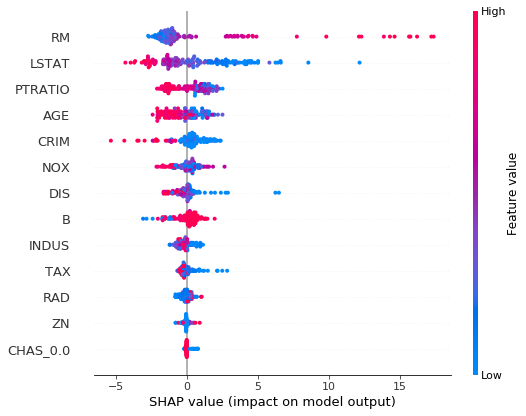

In [33]:
interpret_model(tuned_gbr)